In [17]:
%matplotlib notebook
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [18]:
%matplotlib inline
import pandas as pd
import scipy.stats as stats

In [19]:
df = pd.read_csv("CM_Dummy_Data/df.csv")
df=df.fillna(0)
df.head()

,Team Code,Team Name,Conference,Game Code,Date,Rush Yard,Pass Yard,Total Yards,Bye,Off Points,Def Points,Result
0,8,Alabama,Southeastern Conference,8.070000e+12,8/31/2013,96,110,206,0,21,7,W
1,8,Alabama,Southeastern Conference,8.070000e+12,9/14/2013,234,334,568,0,37,20,W
2,8,Alabama,Southeastern Conference,1.560000e+14,9/21/2013,66,272,338,0,21,3,W
3,8,Alabama,Southeastern Conference,4.330000e+14,9/28/2013,254,180,434,0,32,16,W
4,8,Alabama,Southeastern Conference,2.540000e+14,10/5/2013,181,296,477,0,36,13,W


In [88]:
#following block determines the desired data (yard and points for games after bye week vs. non - bye week games)

#looked up a function online to pull year information from a date. Through that, found out the Date column wasn't a date in pandas. Converted first
#PLZ NOTE , MIGHT WANT TO TAKE THIS OUT 
df["Year"]=df["Date"].apply(pd.to_datetime).dt.year

#determining the average amount of yards and points after a bye week per team
byeWeeks=df[df["Bye"]=="x"]
ByeWeekOffYards = byeWeeks.groupby("Team Name")["Total Yards"].mean()
ByeWeekOffPts = byeWeeks.groupby("Team Name")["Off Points"].mean()
ByeWeekDefPts = byeWeeks.groupby("Team Name")["Def Points"].mean()

#determining the average amount of yards and points after on a non-bye week per team
non_byeWeeks=df[df["Bye"]!="x"]
non_ByeWeekOffYards = non_byeWeeks.groupby("Team Name")["Total Yards"].mean()
non_ByeWeekOffPts = non_byeWeeks.groupby("Team Name")["Off Points"].mean()
non_ByeWeekDefPts = non_byeWeeks.groupby("Team Name")["Def Points"].mean()

#determining the total number of W's after bye weeks
#PLEASE NOTE, IF NOT ALL TEAMS HAVE A BYE WEEK W, WE MIGHT HAVE TO ADD THEM TO THE BOTTOM OF THE ARRAY, NEED TO CHECK
byeWeek_Wins=byeWeeks[byeWeeks["Result"] == "W"]
byeWeek_Wins = byeWeek_Wins.groupby("Team Name")["Result"].count()

In [89]:
df_ByeWeekStats = pd.merge(ByeWeekOffYards,ByeWeekOffPts, on=["Team Name"])
df_ByeWeekStats = pd.merge(df_ByeWeekStats,ByeWeekDefPts, on=["Team Name"])

df_Non_ByeWeekStats = pd.merge(non_ByeWeekOffYards,non_ByeWeekOffPts, on=["Team Name"])
df_Non_ByeWeekStats = pd.merge(df_Non_ByeWeekStats,non_ByeWeekDefPts, on=["Team Name"])

Wins = df.groupby("Team Name")["Team Code"].count()
df_wins = pd.merge(Wins,byeWeek_Wins, on=["Team Name"], how = "left")
df_wins=df_wins.fillna(0)
df_wins = df_wins.drop(["Team Code"], axis=1)

df_stats = pd.merge(df_ByeWeekStats,df_Non_ByeWeekStats, on=["Team Name"])
df_stats = pd.merge(df_stats,df_wins, on=["Team Name"])

df_stats = df_stats.rename(columns={"Total Yards_x": "Bye Week - Average Yards", "Off Points_x": "Bye Week - Average Offensive Points", \
                                   "Def Points_x": "Bye Week - Average Defensive Points", "Total Yards_y": "Non Bye Week - Average Yards", \
                                    "Off Points_y": "Non Bye Week - Average Offensive Points", "Def Points_y": "Non Bye Week - Average Defensive Points",\
                                   "Result" : "Wins after Bye Week"})

In [90]:
#build out the visualization; weekly chart  - if possible; merge w/ DT

In [94]:
#pulls in conference names
dfConf = df[["Team Name", "Conference"]]
dfConf=dfConf.drop_duplicates()
df_finaldata=df_stats.merge(dfConf, on='Team Name', how='left')
df_finaldata.head()

,Team Name,Bye Week - Average Yards,Bye Week - Average Offensive Points,Bye Week - Average Defensive Points,Non Bye Week - Average Yards,Non Bye Week - Average Offensive Points,Non Bye Week - Average Defensive Points,Wins after Bye Week,Conference
0,Alabama,495,34,9,450.666667,24.000000,13.416667,1.0,Southeastern Conference
1,Arkansas,346,8,21,358.181818,13.727273,18.363636,0.0,Southeastern Conference
2,Auburn,375,39,11,511.000000,26.230769,11.000000,1.0,Southeastern Conference
3,Boston College,473,29,10,358.416667,12.333333,19.416667,1.0,Atlantic Coast Conference
4,Clemson,610,24,7,500.083333,23.250000,12.000000,1.0,Atlantic Coast Conference


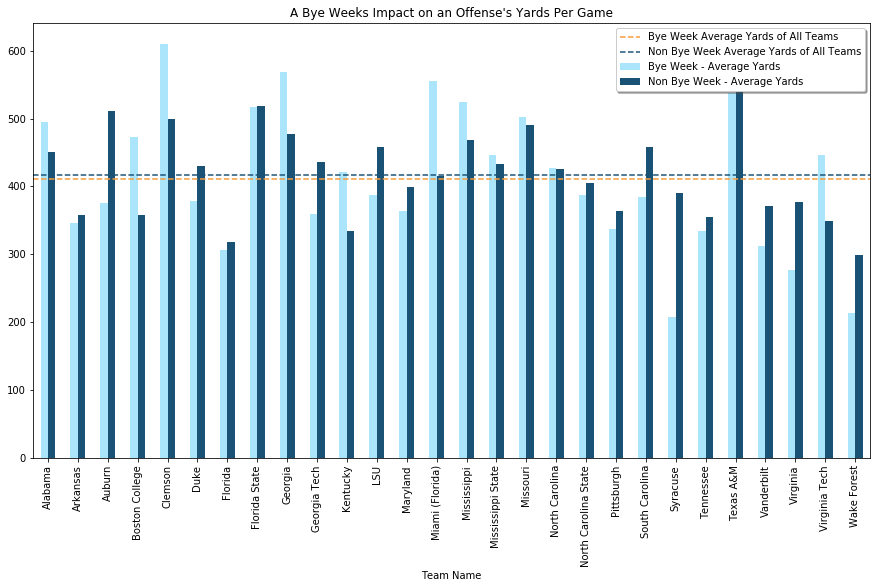

In [143]:
#bar chart for average yards

df_finaldata.plot(kind="bar", x="Team Name", y=["Bye Week - Average Yards", "Non Bye Week - Average Yards"], figsize=(15,8),
              title="A Bye Weeks Impact on an Offense's Yards Per Game", color = ["#ABE5FC","#1A5276"])

meanByeYards = df_finaldata["Bye Week - Average Yards"].mean()
plt.axhline(y=meanByeYards, c = "#F89C3A", ls = "--", label = "Bye Week Average Yards of All Teams")

meanNonByeYards = df_finaldata["Non Bye Week - Average Yards"].mean()
plt.axhline(y=meanNonByeYards, c = "#1A5276", ls = "--",  label = "Non Bye Week Average Yards of All Teams")
plt.legend(shadow = True)

(0, 50)

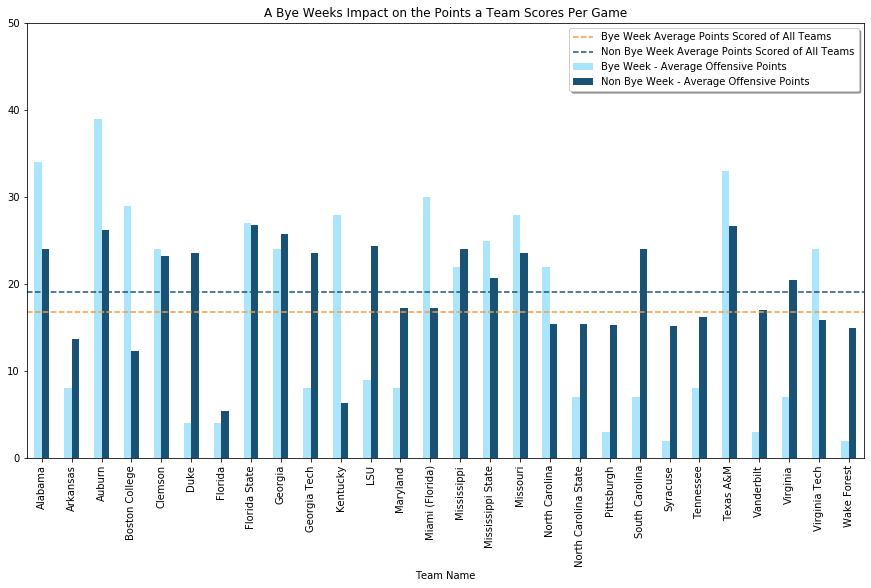

In [144]:
#bar chart for points for

df_finaldata.plot(kind="bar", x="Team Name", y=["Bye Week - Average Offensive Points", "Non Bye Week - Average Offensive Points"], figsize=(15,8),
              title="A Bye Weeks Impact on the Points a Team Scores Per Game", color = ["#ABE5FC","#1A5276"])

meanByePts = df_finaldata["Bye Week - Average Offensive Points"].mean()
plt.axhline(y=meanByePts, c = "#F89C3A", ls = "--", label = "Bye Week Average Points Scored of All Teams")

meanNonByePts = df_finaldata["Non Bye Week - Average Offensive Points"].mean()
plt.axhline(y=meanNonByePts, c = "#1A5276", ls = "--",  label = "Non Bye Week Average Points Scored of All Teams")
plt.legend(shadow = True)
axes = plt.gca()
axes.set_ylim([0,50])

(0, 50)

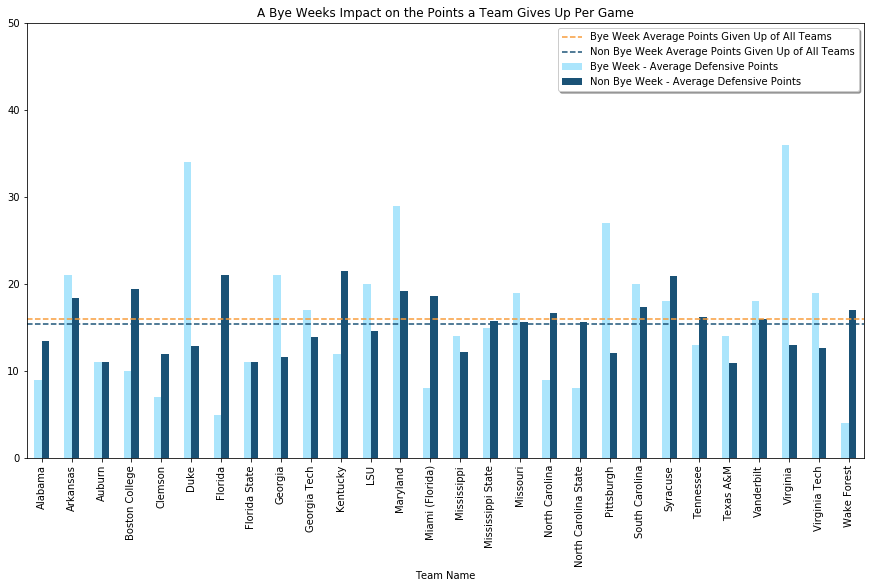

In [145]:
#bar chart for points against

df_finaldata.plot(kind="bar", x="Team Name", y=["Bye Week - Average Defensive Points", "Non Bye Week - Average Defensive Points"], figsize=(15,8),
              title="A Bye Weeks Impact on the Points a Team Gives Up Per Game", color = ["#ABE5FC","#1A5276"])

meanByePtsAgainst = df_finaldata["Bye Week - Average Defensive Points"].mean()
plt.axhline(y=meanByePtsAgainst, c = "#F89C3A", ls = "--", label = "Bye Week Average Points Given Up of All Teams")

meanNonByePtsAgainst = df_finaldata["Non Bye Week - Average Defensive Points"].mean()
plt.axhline(y=meanNonByePtsAgainst, c = "#1A5276", ls = "--",  label = "Non Bye Week Average Points Given Up of All Teams")
plt.legend(shadow = True)
axes = plt.gca()
axes.set_ylim([0,50])

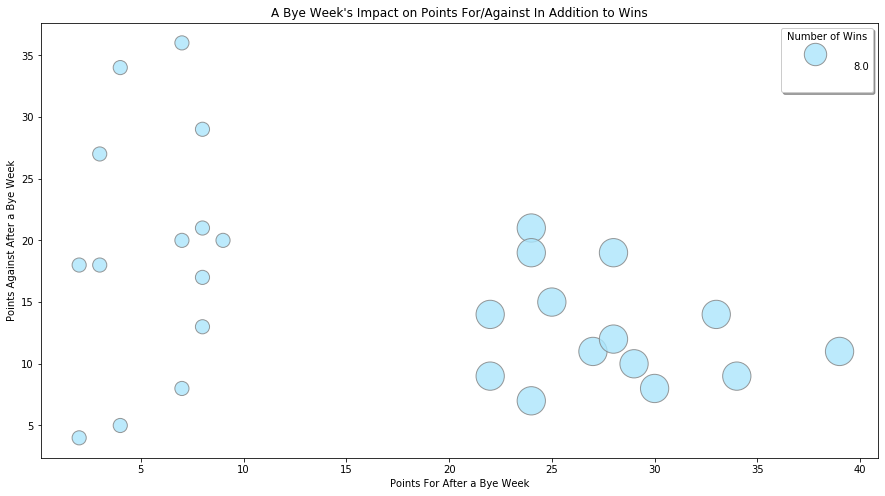

In [150]:
#bubble chart for point comparison to wins
x = df_finaldata["Bye Week - Average Offensive Points"]
y = df_finaldata["Bye Week - Average Defensive Points"]
#NOTE NOTE NOTE CHANGE WHAT IS AFTER THE DATA, DID THIS TO MAKE THIS GRAPH LOOK LIKE SOMETHING. ITS ONLY 1 YR SO ITS 0 or 1
z = df_finaldata["Wins after Bye Week"]*6+2

plt.figure(figsize=(15,8))
plt.scatter(x, y, s=z*100, alpha=0.8, c = "#ABE5FC", edgecolors = "grey")
plt.xlabel("Points For After a Bye Week")
plt.ylabel("Points Against After a Bye Week")
plt.title("A Bye Week's Impact on Points For/Against In Addition to Wins")
#might need to change around the legend; depends on how it looks w/ the wins. not too worried about it rn 
plt.legend(z, loc="upper right", title="Number of Wins", shadow = True, handleheight=6, handlelength=6)

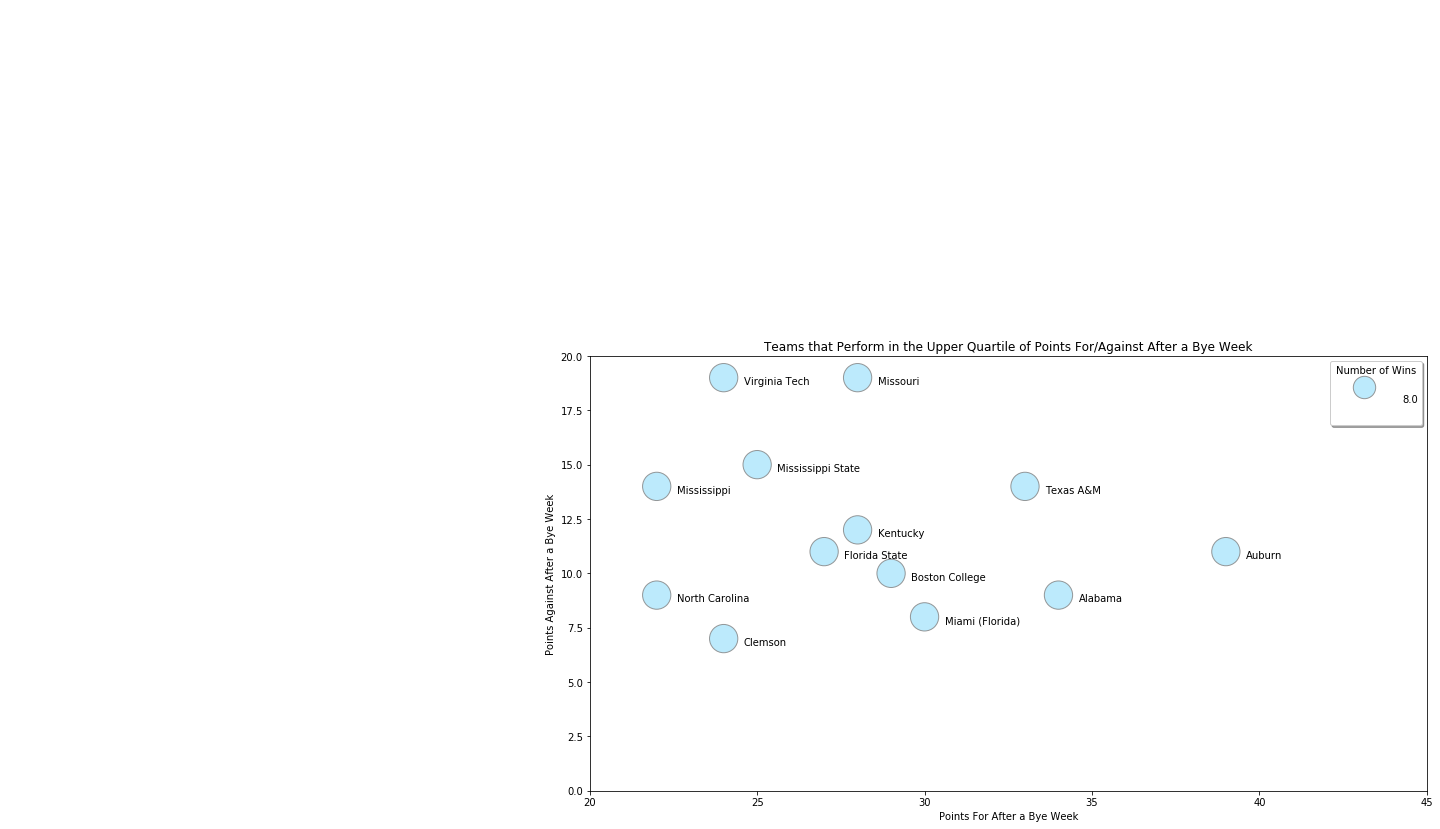

In [174]:
#bubble chart for point comparison to wins for best teams
x = df_finaldata["Bye Week - Average Offensive Points"]
y = df_finaldata["Bye Week - Average Defensive Points"]
teams = df_finaldata["Team Name"]
#NOTE NOTE NOTE CHANGE WHAT IS AFTER THE DATA, DID THIS TO MAKE THIS GRAPH LOOK LIKE SOMETHING. ITS ONLY 1 YR SO ITS 0 or 1
z = df_finaldata["Wins after Bye Week"]*6+2

plt.figure(figsize=(15,8))
plt.scatter(x, y, s=z*100, alpha=0.8, c = "#ABE5FC", edgecolors = "grey")
plt.xlabel("Points For After a Bye Week")
plt.ylabel("Points Against After a Bye Week")
plt.title("Teams that Perform in the Upper Quartile of Points For/Against After a Bye Week")

axes = plt.gca()
axes.set_ylim([0,20])
axes.set_xlim([20,45])

#found code online to help annotate the team names
for i, txt in enumerate(df_finaldata["Team Name"]):
    axes.annotate(txt, (x[i], y[i]), xytext=(x[i]+.6, y[i]-.3))

#might need to change around the legend; depends on how it looks w/ the wins. not too worried about it rn 
plt.legend(z, loc="upper right", title="Number of Wins", shadow = True, handleheight=6, handlelength=6)


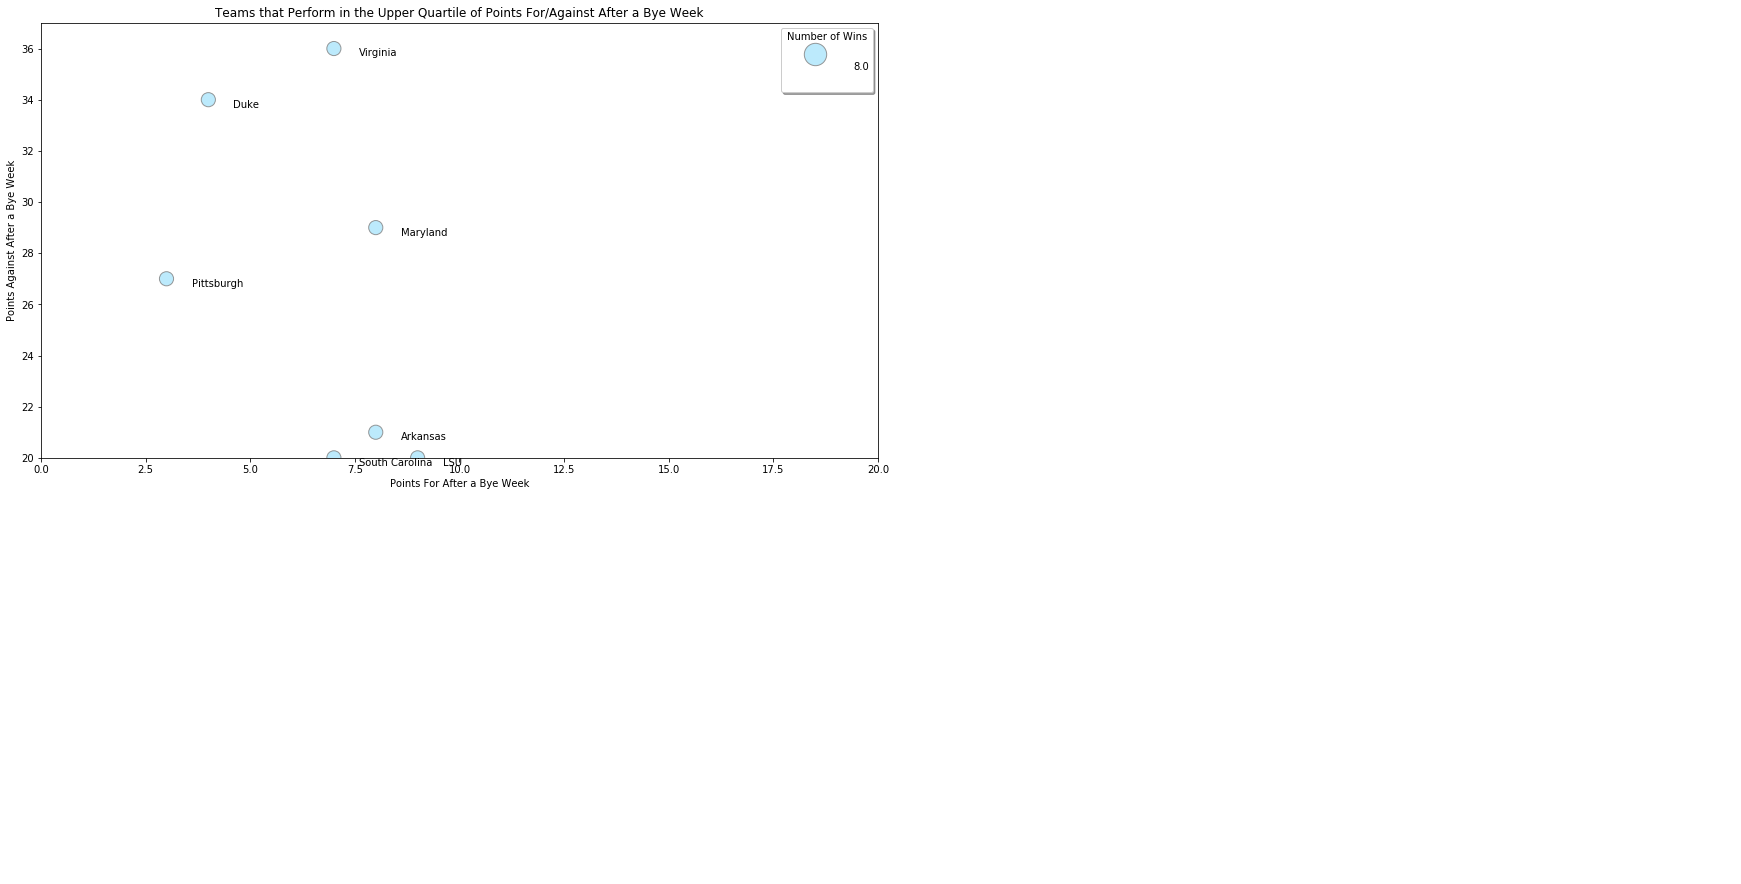

In [169]:
#bubble chart for point comparison to wins for worst teams
x = df_finaldata["Bye Week - Average Offensive Points"]
y = df_finaldata["Bye Week - Average Defensive Points"]
#NOTE NOTE NOTE CHANGE WHAT IS AFTER THE DATA, DID THIS TO MAKE THIS GRAPH LOOK LIKE SOMETHING. ITS ONLY 1 YR SO ITS 0 or 1
z = df_finaldata["Wins after Bye Week"]*6+2

plt.figure(figsize=(15,8))
plt.scatter(x, y, s=z*100, alpha=0.8, c = "#ABE5FC", edgecolors = "grey")
plt.xlabel("Points For After a Bye Week")
plt.ylabel("Points Against After a Bye Week")
plt.title("Teams that Perform in the Upper Quartile of Points For/Against After a Bye Week")

axes = plt.gca()
axes.set_ylim([20,37])
axes.set_xlim([0,20])

#found code online to help annotate the team names
for i, txt in enumerate(df_finaldata["Team Name"]):
    axes.annotate(txt, (x[i], y[i]), xytext=(x[i]+.6, y[i]-.3))

#might need to change around the legend; depends on how it looks w/ the wins. not too worried about it rn 
plt.legend(z, loc="upper right", title="Number of Wins", shadow = True, handleheight=6, handlelength=6)

<Figure size 1080x576 with 0 Axes>

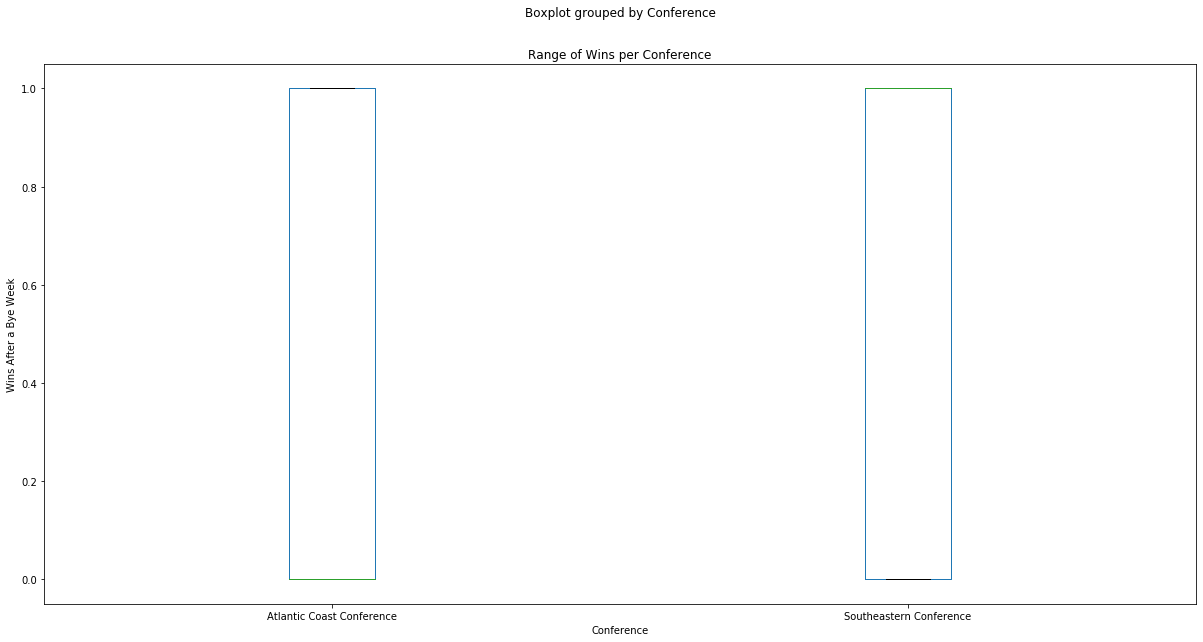

In [183]:
plt.figure(figsize=(15,8))
df_finaldata.boxplot("Wins after Bye Week", by="Conference", figsize=(20, 10))
plt.title("Range of Wins per Conference")
plt.ylabel("Wins After a Bye Week")
plt.grid(False)

In [176]:
# Extract individual groups
ACC = df_finaldata[df_finaldata["Conference"] == "Atlantic Coast Conference"]["Wins after Bye Week"]
SEC = df_finaldata[df_finaldata["Conference"] == "Southeastern Conference"]["Wins after Bye Week"]
#Pac12 = df_finaldata[df_finaldata["Conference"] == "Pac12 Conference"]["Wins after Bye Week"]
#Big10 = df_finaldata[df_finaldata["Conference"] == "Big 10 Conference"]["Wins after Bye Week"]
#Big12 = df_finaldata[df_finaldata["Conference"] == "Big 12 Conference"]["Wins after Bye Week"]
# ANOVA Test
stats.f_oneway(ACC, SEC)#, Pac12, Big10, Big12)

F_onewayResult(statistic=0.5416666666666666, pvalue=0.4683312571918071)